In [22]:
import pandas as pd
import joblib
!pip install eli5
import eli5
import matplotlib.pyplot as plt
from eli5.sklearn import PermutationImportance

In [23]:
import fake_news_spreader_feature_extraction as feature_extraction
from fake_news_spreader_feature_extraction import cleanPunc, clean_relics

df = pd.read_csv("scaled_final_complete_features_with_labels_and_ids", sep=",", encoding="utf8")

data_tfidf = df[[str(x) for x in range(1000)]]
data_readability = df[
    ['avg_word_count', 'emoji_count', 'slang_count', 'capitalized_count', 'full_capitalized_count',
     'retweets_count', 'user_mentions_count', 'hashtags_count', 'url_count']]
data_sentiment = df[
    ['anger', 'fear', 'joy', 'sadness', 'negation', 'vader_compound_score', 'textblob_polarity_score']]
data_personality = df[['extraversion', 'avoidance', 'conscientiousness', 'openness', 'neuroticism',
                       'agreeableness', 'anxiety']]
data_gender = df[['gender']]
data_liwc = df[['Analytic', 'Clout', 'Authentic', 'Tone']]
data_ground_truth = df[['ground_truth']]

features = list()
features.append([data_readability, data_sentiment, data_personality, data_gender, data_liwc, data_ground_truth])

for feature_combination in features:
    features = pd.concat([i for i in feature_combination], axis=1)

    X = features.drop(['ground_truth'], axis=1).reset_index(drop=True)
    y = features[['ground_truth']].values.ravel()

    print(X)
    print(y)

     avg_word_count  emoji_count  slang_count  capitalized_count  \
0          0.663098     0.558824     0.031250           0.271199   
1          0.426124     0.000000     0.000000           0.593583   
2          0.720200     0.082353     0.000000           0.216960   
3          0.321913     0.000000     0.000000           0.627960   
4          0.199857     0.005882     0.000000           0.475172   
..              ...          ...          ...                ...   
295        0.364026     0.000000     0.000000           0.587471   
296        0.411135     0.011765     0.000000           0.365164   
297        0.298358     0.000000     0.000000           0.372040   
298        0.433976     0.000000     0.000000           0.430099   
299        0.344754     0.011765     0.010417           0.381971   

     full_capitalized_count  retweets_count  user_mentions_count  \
0                  0.028256        0.465409             0.191529   
1                  0.063882        0.006289    

In [24]:
filename = "classifiers/fake_news/" \
           "Random Forest_explanations_readability_sentiment_personality_gender_liwc_0.72.sav"
model = joblib.load(filename)

y_predicted = model.predict(X.values)
perm = PermutationImportance(model).fit(X, y)
eli5.show_weights(perm, feature_names=X.columns.tolist(), top=20)

In [25]:
sample = 1

print('Reference:', y[sample])
print('Predicted:', y_predicted[sample])
eli5.show_prediction(model, X.iloc[sample],
                     feature_names=X.columns.tolist(), show_feature_values=True)

Reference: 1.0
Predicted: 1.0


In [26]:
sample = 2

print('Reference:', y[sample])
print('Predicted:', y_predicted[sample])
eli5.show_prediction(model, X.iloc[sample],
                     feature_names=X.columns.tolist(), show_feature_values=True)

Reference: 0.0
Predicted: 0.0


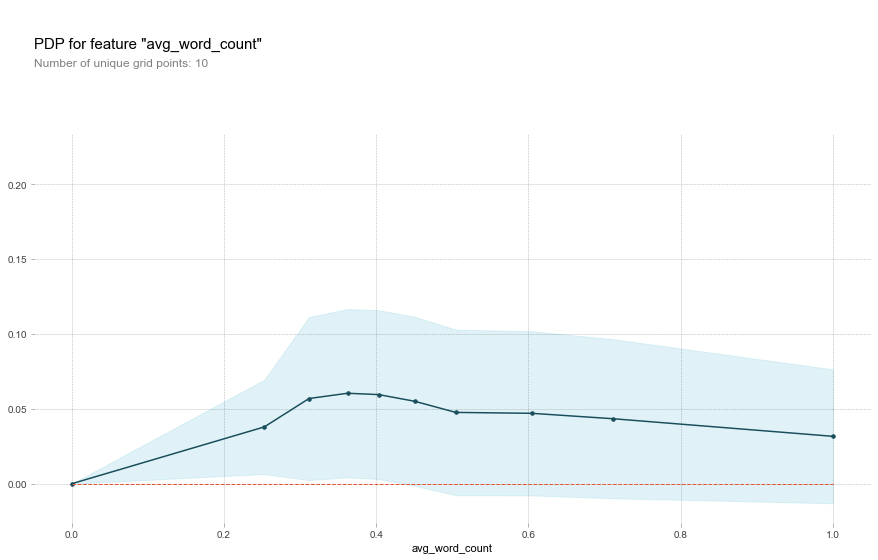

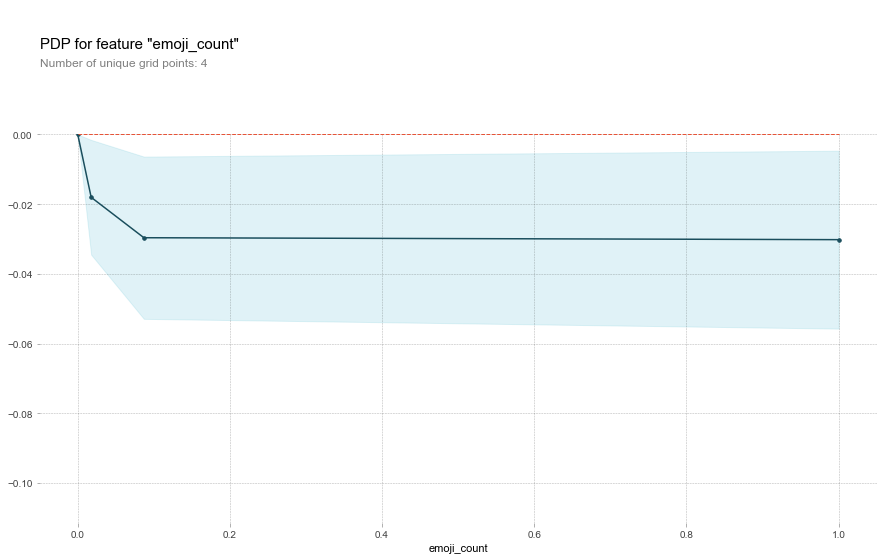

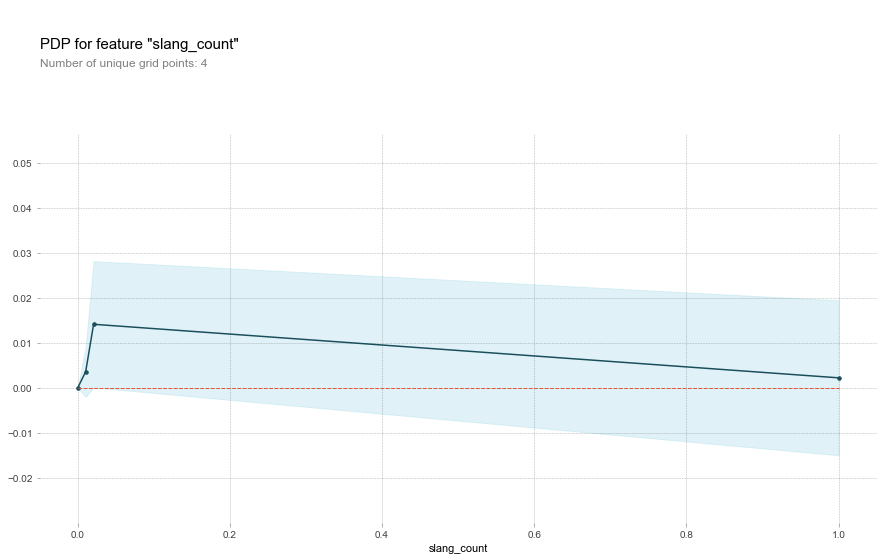

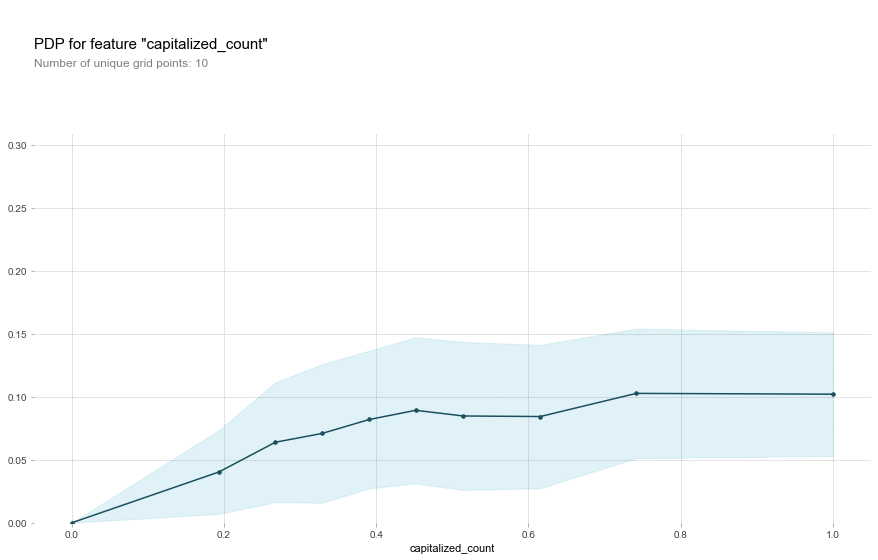

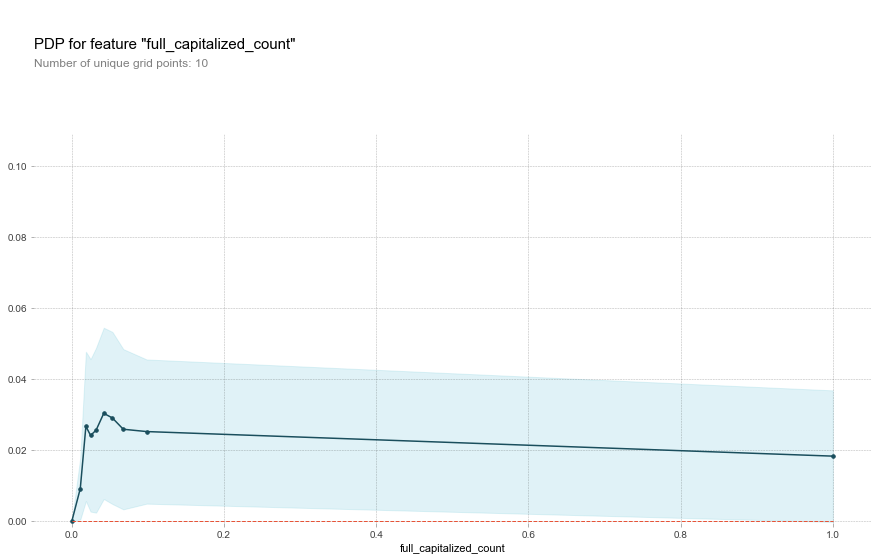

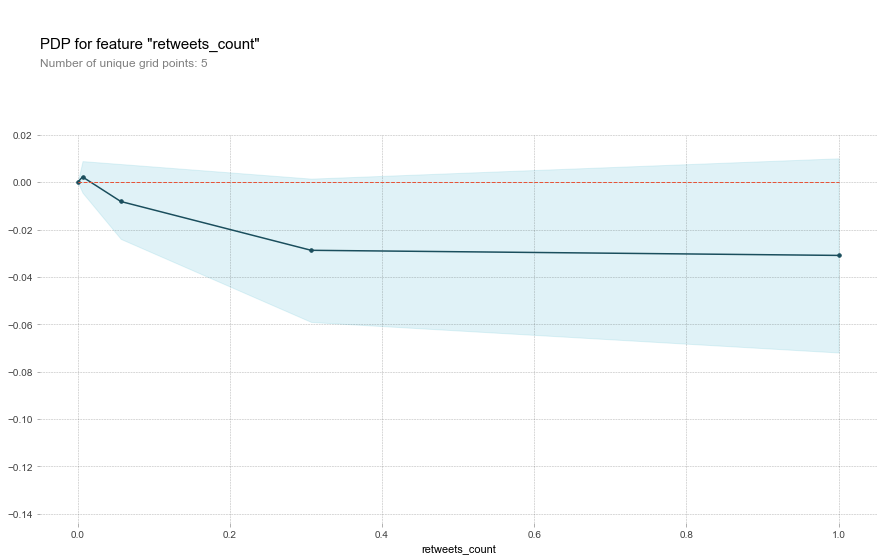

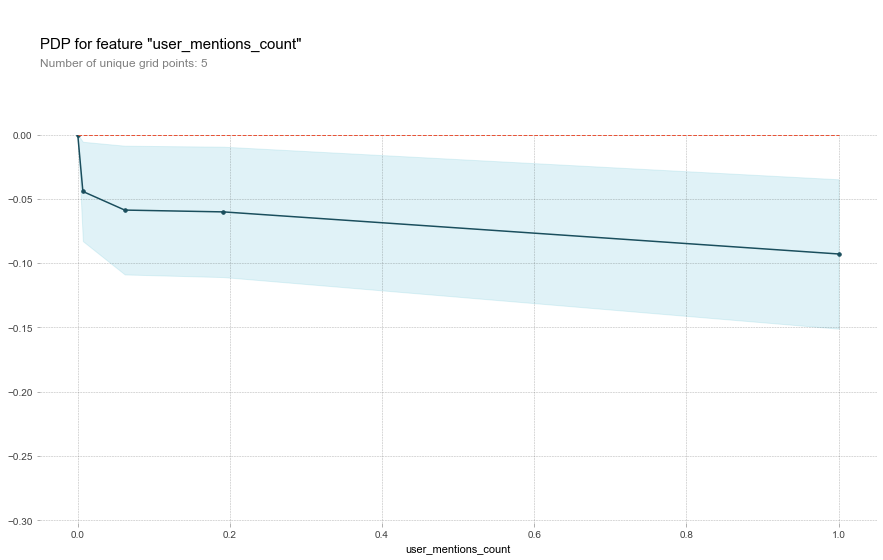

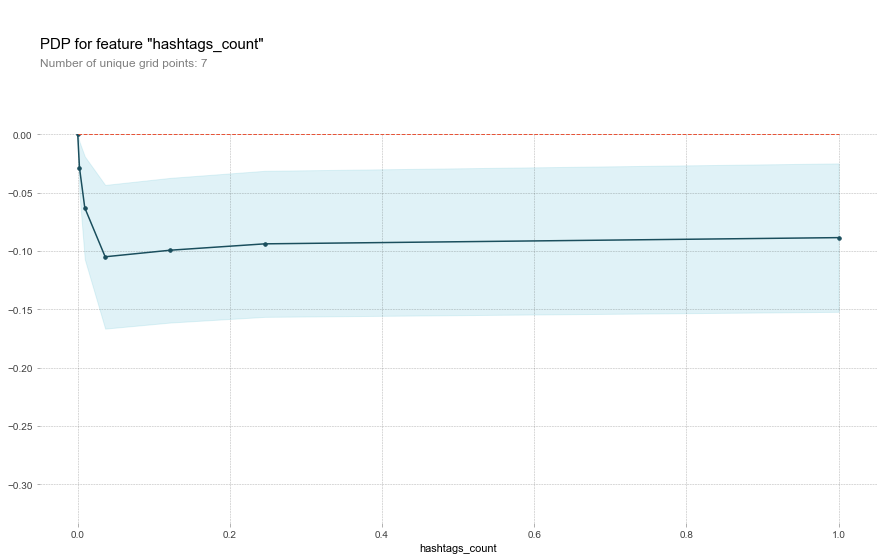

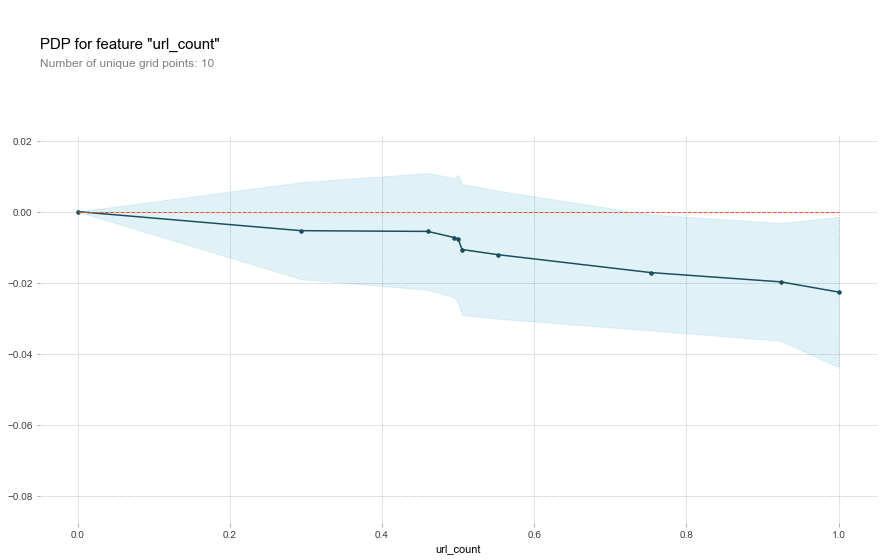

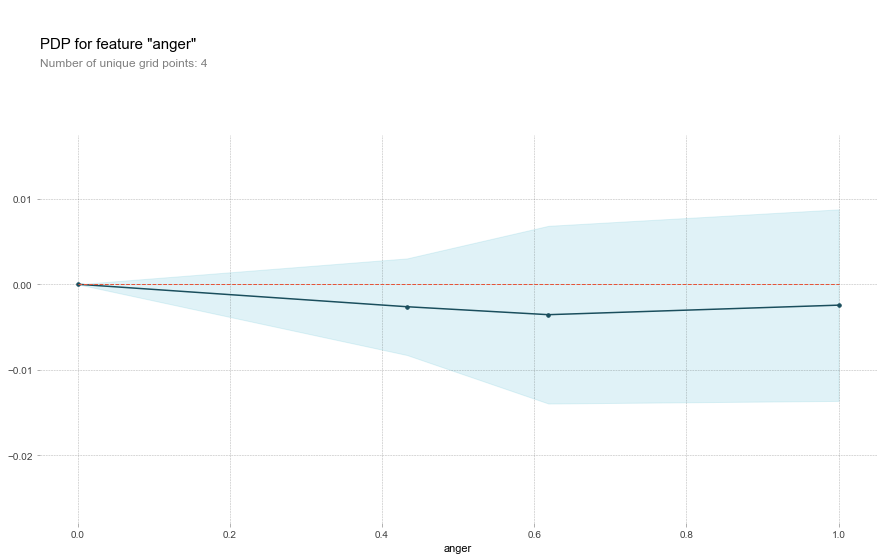

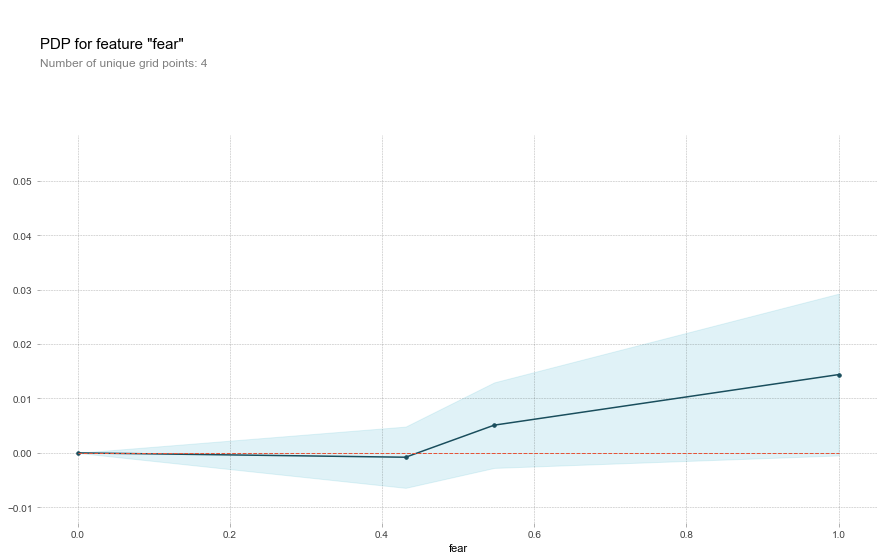

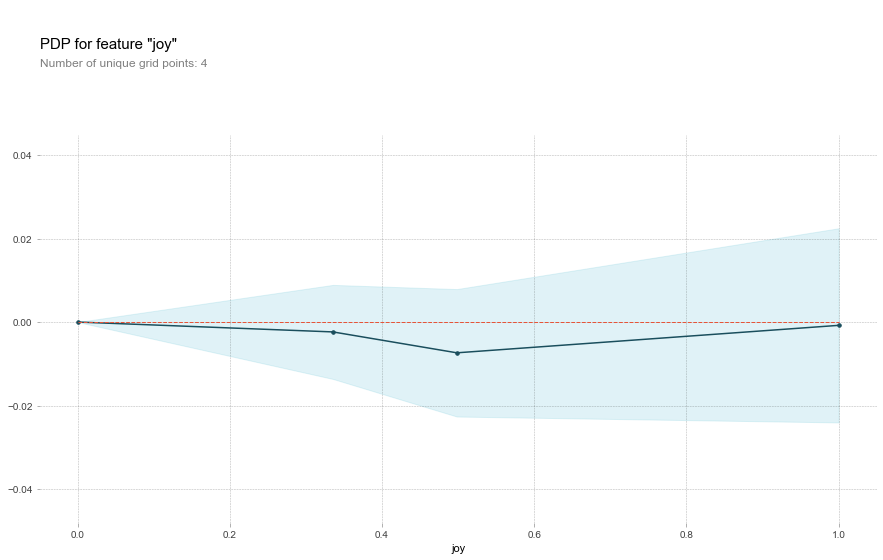

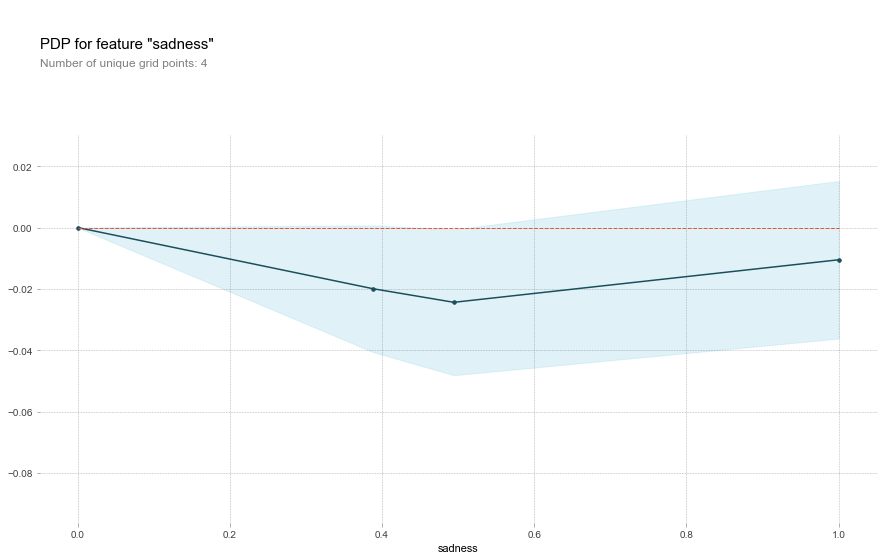

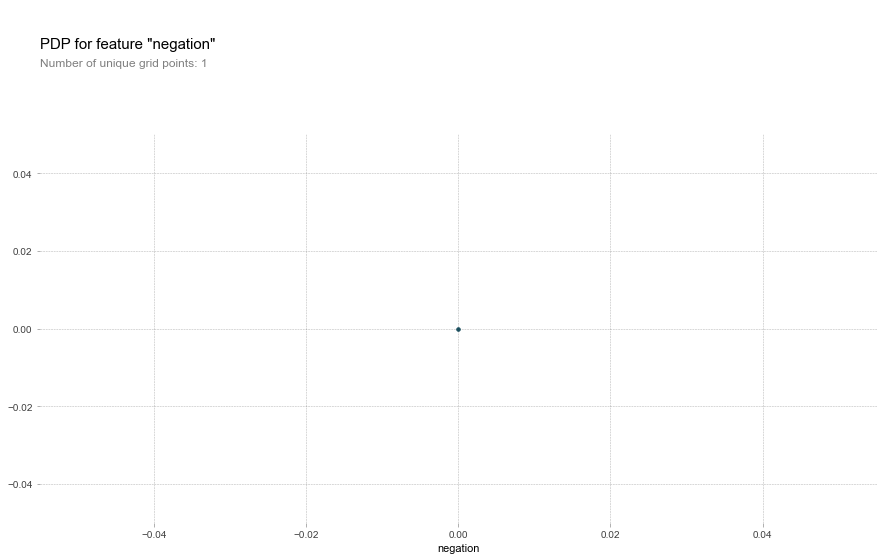

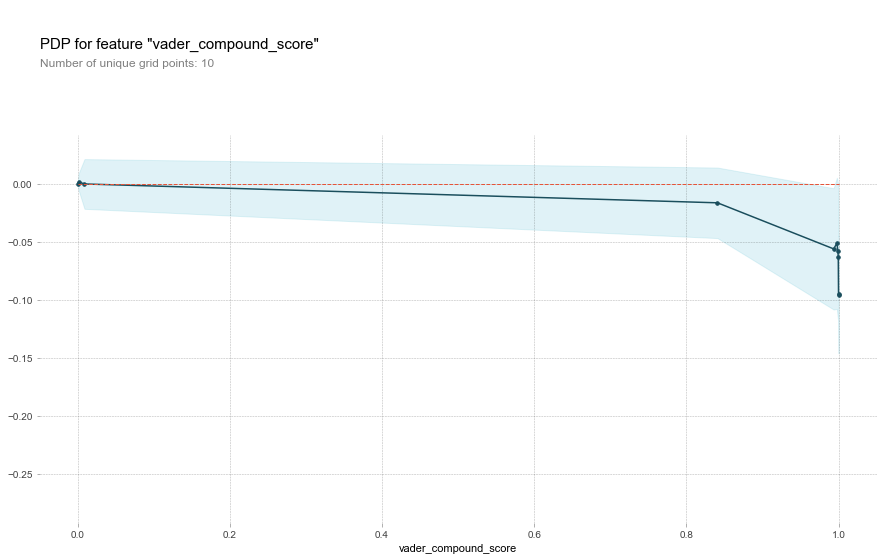

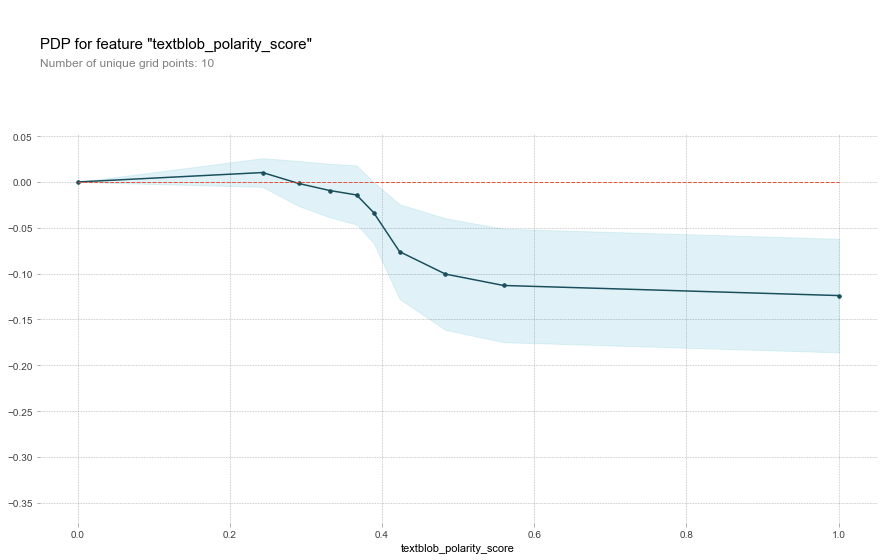

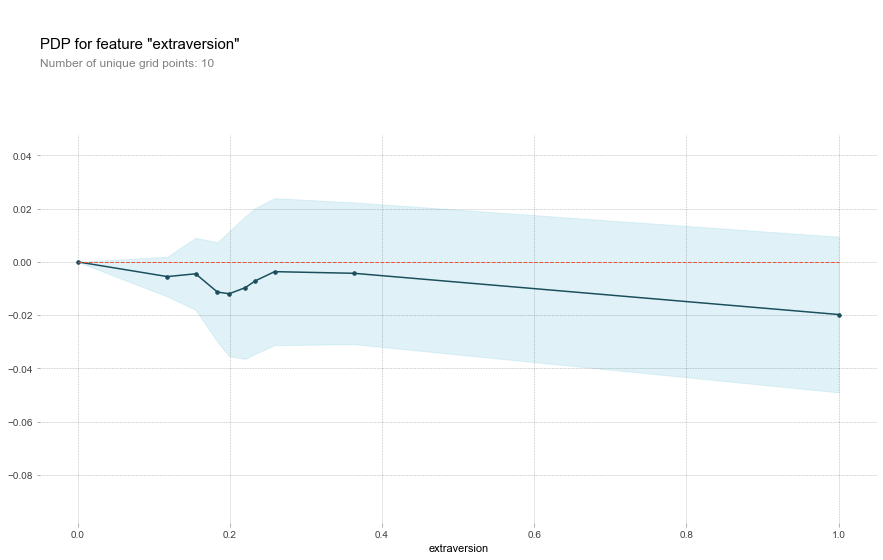

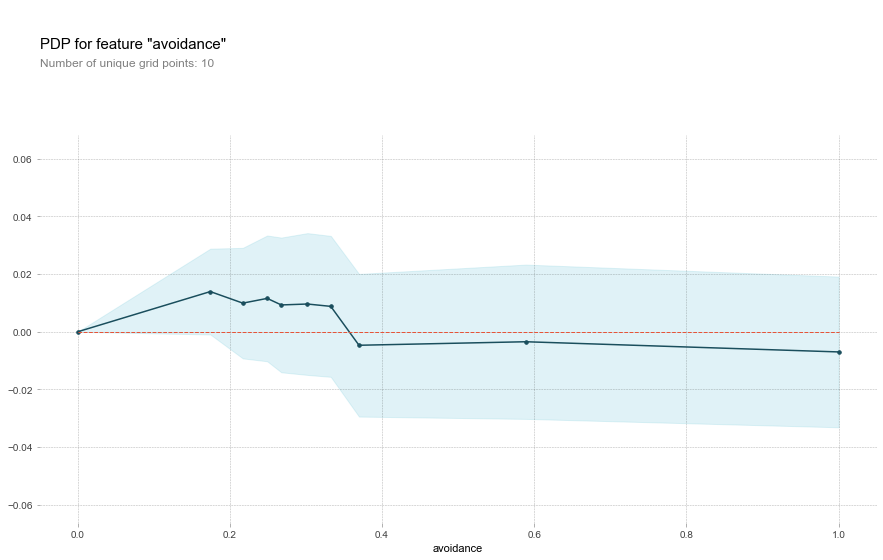

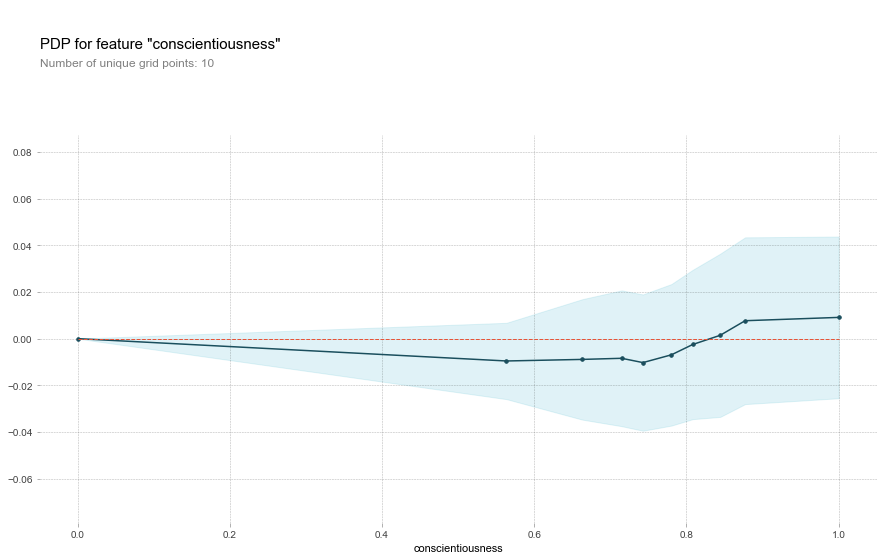

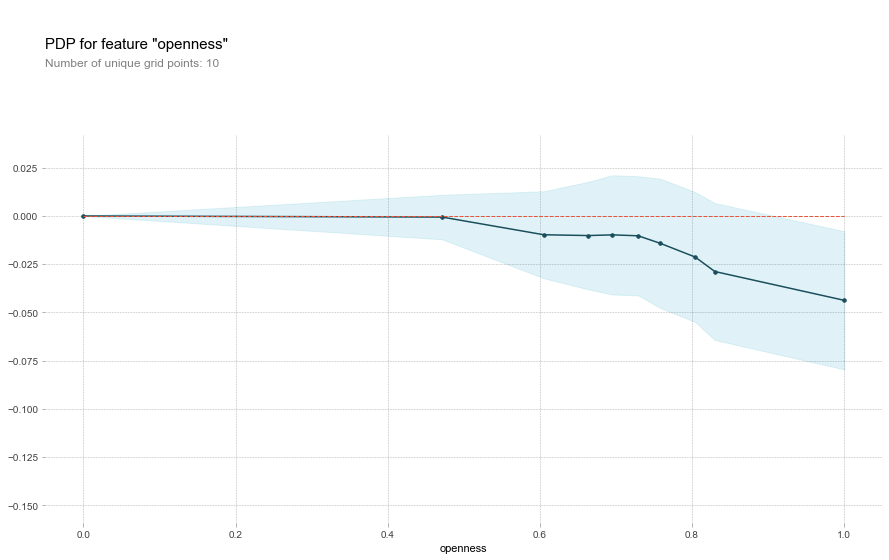

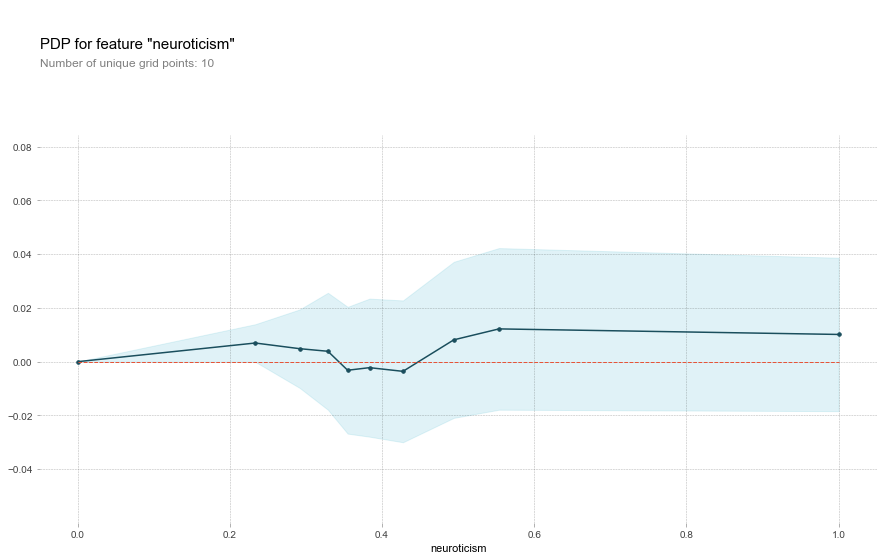

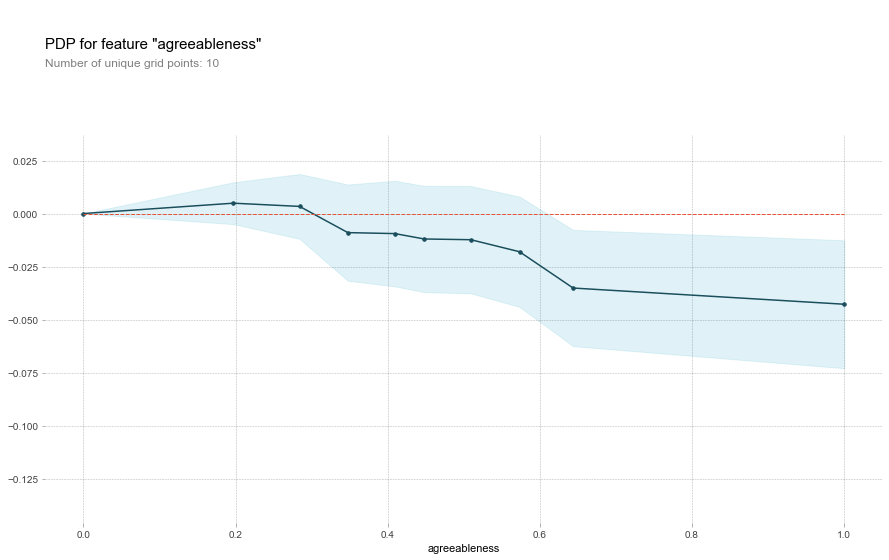

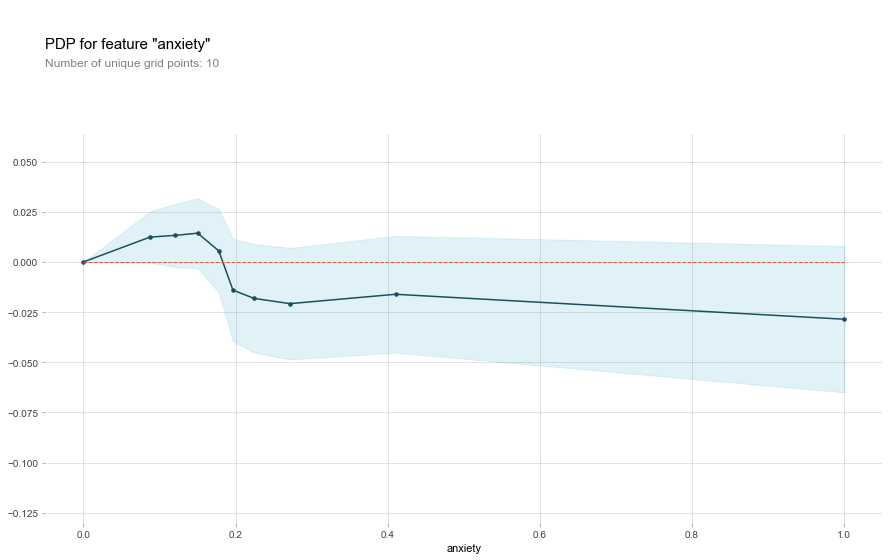

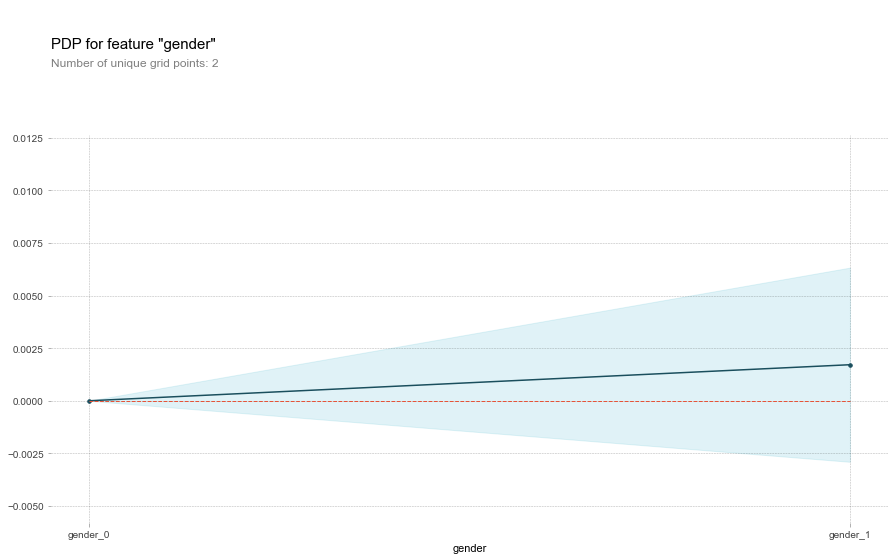

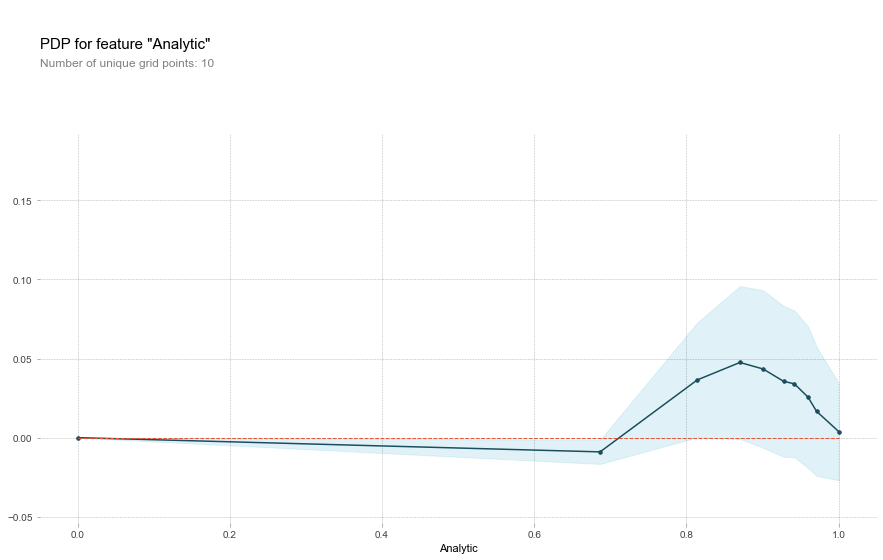

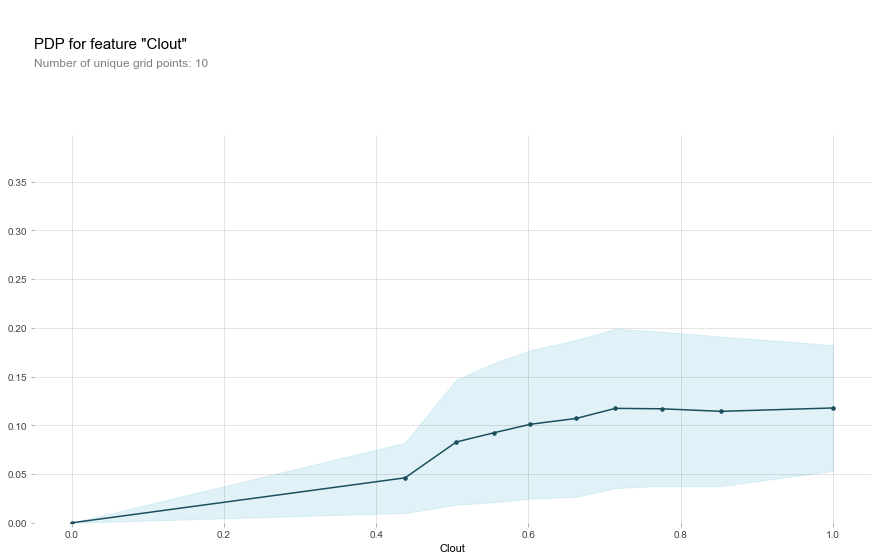

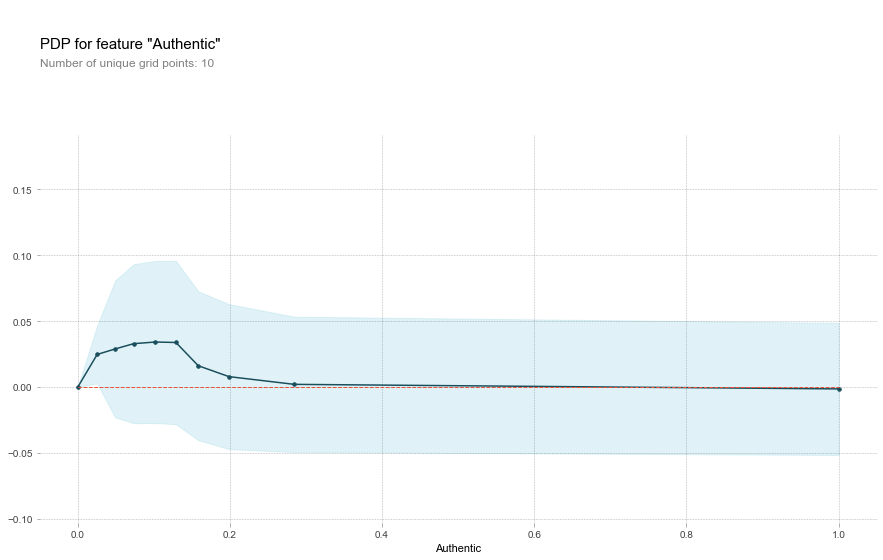

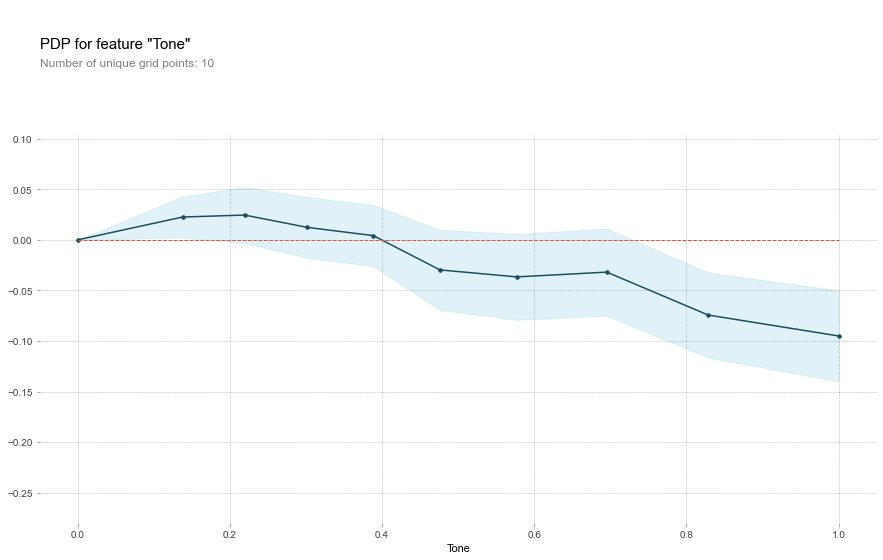

In [27]:
!pip install pdpbox
from pdpbox import pdp, get_dataset, info_plots

def plot_pdp(model, df, feature, cluster_flag=False, nb_clusters=None, lines_flag=False):

    # Create the data that we will plot
    pdp_goals = pdp.pdp_isolate(model=model, dataset=df, model_features=df.columns.tolist(), feature=feature)

    # plot it
    pdp.pdp_plot(pdp_goals, feature, cluster=cluster_flag, n_cluster_centers=nb_clusters, plot_lines=lines_flag)
    plt.savefig('explanations/pdp/{0}_pdp.png'.format(feature))

# plot the PD univariate plot for each feature
for feature in X.columns:
    plot_pdp(model, X, feature)

# plot_pdp(model, X, 'capitalized_count')
# plot_pdp(model, X, 'hashtags_count')

In [28]:
!pip install lime
import lime.lime_tabular

# Change the number below to test other instances
sample = 1
newXtest = X.values[sample]
y_true = y[sample]
y_pp = y_predicted[sample]
explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=X.columns.values.tolist()
                                                   ,class_names=[0,1])
predict_fn = lambda x: model.predict_proba(x).astype(float)
explanation = explainer.explain_instance(X.values[sample], predict_fn, num_features=10)

print('Reference:', y[sample])
print('Predicted:', y_predicted[sample])
explanation.show_in_notebook()

Reference: 1.0
Predicted: 1.0


Expected Value:  [0.50029825 0.49970175]


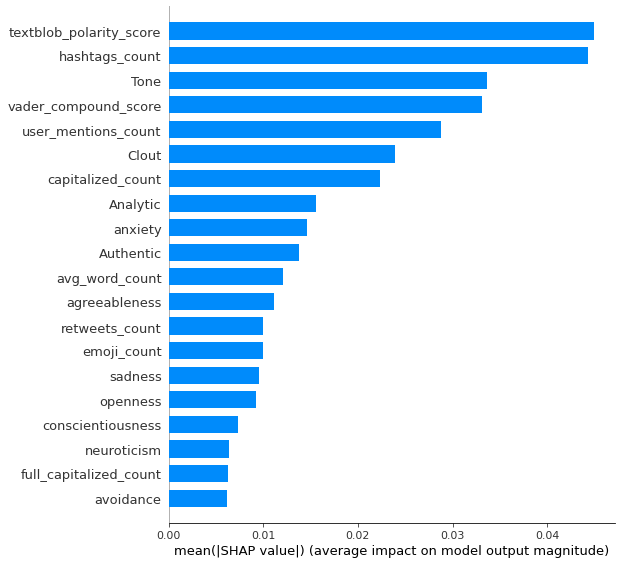

In [29]:
!pip install shap
import shap

# load JS visualization code to notebook
shap.initjs()

shap_explainer = shap.TreeExplainer(model)
shap_values = shap_explainer.shap_values(X)

print('Expected Value: ', shap_explainer.expected_value)
shap.summary_plot(shap_values[1], X, plot_type="bar")

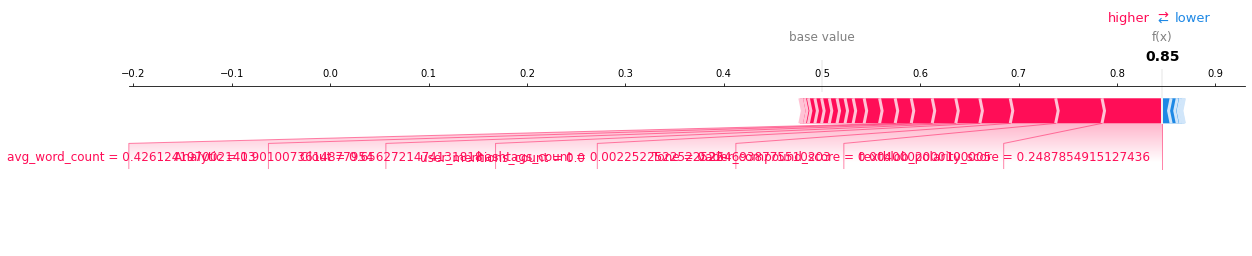

In [30]:
# load JS visualization code to notebook

shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# change the value below to change instance
sample=1

shap.force_plot(explainer.expected_value[1], shap_values[1][sample,:], X.iloc[sample,:], matplotlib=True)



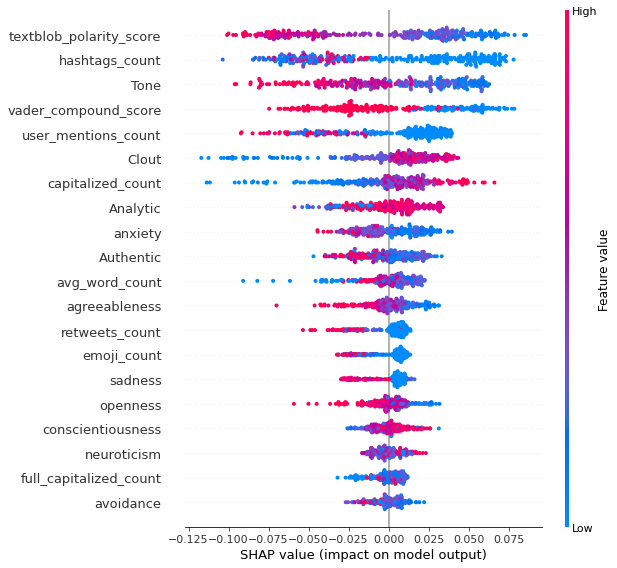

In [31]:
shap.summary_plot(shap_values[1], X)


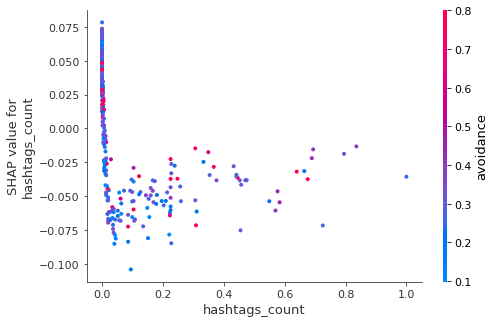

In [32]:
shap.initjs()
feature = "hashtags_count"

shap.dependence_plot(feature, shap_values[1], X,)